In [ ]:
# Packages
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [ ]:
# Import and glimpse the data
df = pd.read_csv('/content/output.csv')
df

In [ ]:
# drop outliers
df_noout = df[df['host_total_listings_count'] < 100]
df_noout = df_noout[df_noout['price'] < 160000]

## Data Manipulation

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3585 non-null   int64  
 1   host_identity_verified     3585 non-null   int64  
 2   host_total_listings_count  3585 non-null   int64  
 3   city                       3585 non-null   int64  
 4   is_location_exact          3585 non-null   int64  
 5   property_type              3585 non-null   int64  
 6   room_type                  3585 non-null   int64  
 7   accommodates               3585 non-null   int64  
 8   bathrooms                  3585 non-null   float64
 9   bedrooms                   3585 non-null   int64  
 10  beds                       3585 non-null   int64  
 11  bed_type                   3585 non-null   int64  
 12  amenities                  3585 non-null   int64  
 13  price                      3585 non-null   int64

In [ ]:
df.describe(include = 'all')

In [ ]:
plt.figure(figsize=(16,10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

There are 3585 observations and 21 variables.



*   Binary Variables: host_identity_verified, is_location_exact, instant_bookable, fraud.
*   Categorical Variables: property_type, room_type, bed_type, cancellation_policy, city.

Change the variables mentioned above from integer to categorical variables since the value itself is meaningless while the corresponding level may be useful to explain the association.


In [ ]:
# change variables from integer to categorical
categorical_variables = ['host_identity_verified', 'is_location_exact', 'instant_bookable', 'fraud',
                         'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']
df[categorical_variables] = df[categorical_variables].astype('category')

In [ ]:
plt.figure(figsize=(12,10))
corr_matrix = df_noout.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
df_noout.describe(include = 'all')

There are 3211 observations now by droppoing 374 observations.

## Plots

In [ ]:
df_noout.columns

Index(['host_response_rate', 'host_identity_verified',
       'host_total_listings_count', 'city', 'is_location_exact',
       'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'bed_type', 'amenities', 'price', 'minimum_nights',
       'number_of_reviews', 'review_scores_rating', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'fraud'],
      dtype='object')

* Numerical Variables

In [ ]:
# numerical variables list
num_var = ['host_response_rate', 'host_total_listings_count', 'accommodates',
            'bathrooms', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights',
            'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

In [ ]:
# plot histograms for each numerical variable group by fraud
for var in num_var :
  plot = sns.FacetGrid(df_noout, col='fraud', height=4, aspect = 1.5)
  plot.map(plt.hist, var)
  plot.set_axis_labels(var, 'Frequency')
  plt.show()


Overall, # (fraud = 0) > # (fraud = 1)
*   host_response_rate: left-skewed, most of the observations have high response rate (e.g., rate >= 80)  
*   host_total_listings_count: right-skewed, most observations have low count. The range of # listing count for (fraud = 0) group is larger since there are some have count larger than 40 while # listing count in (fraud = 1) group concentrated from 0 to 25.
*   accommodates: right-skewed, (fraud = 1) and (fraud = 0) both have number concentrated around 2 to 4.
*   bathrooms and bedrooms (most have one or two),
*  beds: many observations have 2 beds for both fraud group.
*   amenities: (fraud = 0) has three modes (amentites = 750, 2250, 3000); (fraud = 1) has two modes (amentites = 2000, 2750). The range is relative large.
*  price: right-skewed, most are less than 20000. The range of (fraud = 0) listing is larger.
* minimum_nights, number_of_reviews, reviews_per_month: right-skewed,
reviews_per_month all have left-skewed hitograms.
*   reviews_scores_rating left-skewed.

*Interpretation: center (mean or median), range(e.g., min and max), skewness or shape*


* Categorical Variables

In [ ]:
# copy from the data cleaning section, except 'fraud' because it is the target variable
categorical_variables = ['host_identity_verified', 'is_location_exact', 'instant_bookable',
                         'property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city']

In [ ]:
import warnings
warnings.filterwarnings("ignore") # hide the warning messages

# Bar plot for each categorical variables group by fraud again
for var in categorical_variables:
    plot = sns.FacetGrid(df, col='fraud', height=4, aspect=1.8)
    plot.map(sns.countplot, var)
    plot.set_axis_labels(var, 'Frequency')
    plot.set_titles(col_template="{col_name} Fraud={col_var}")
    plt.show()

Need more information about the definition for these variables.







In [ ]:
# lmplot for each pair of numerical variables group by fraud
# for var_x in num_var:
#    for var_y in num_var:
#        if var_x != var_y:  # Exclude plotting the variable against itself
#            plot = sns.lmplot(x=var_x, y=var_y, hue='fraud', data=df_noout, height=6)
#            plt.show()

Keep 5-8 graphs from below? select most useful ones (align the results from the stat model part, or can explain the model results)


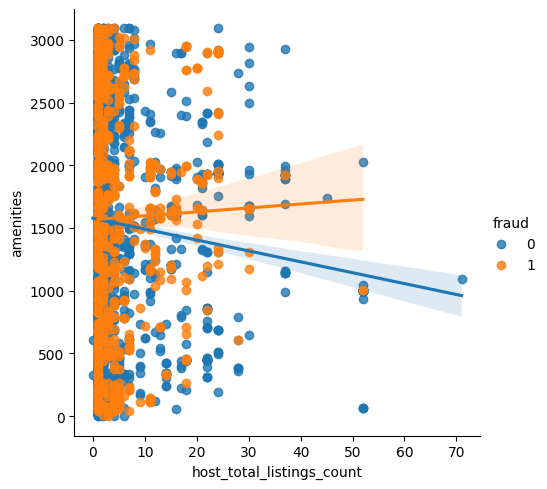

In [ ]:
sns.lmplot(x = 'host_total_listings_count', y = 'amenities',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'host_total_listings_count', y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)

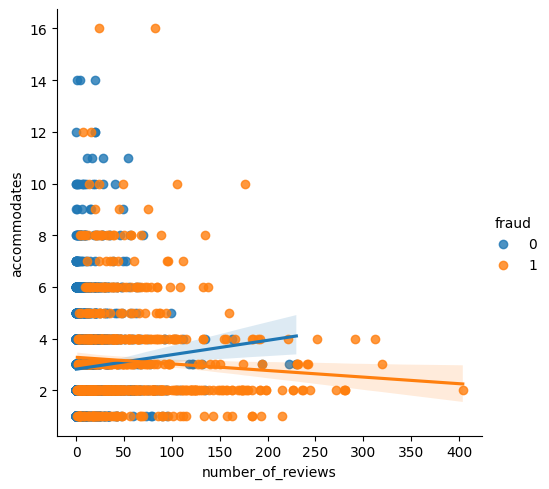

In [ ]:
sns.lmplot(x = 'number_of_reviews',y= 'accommodates',
           hue = 'fraud', data = df_noout)

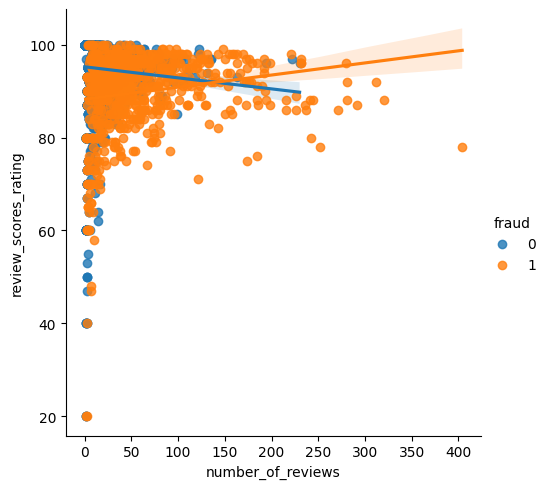

In [ ]:
sns.lmplot(y = 'review_scores_rating',x= 'number_of_reviews',
           hue = 'fraud', data = df_noout)

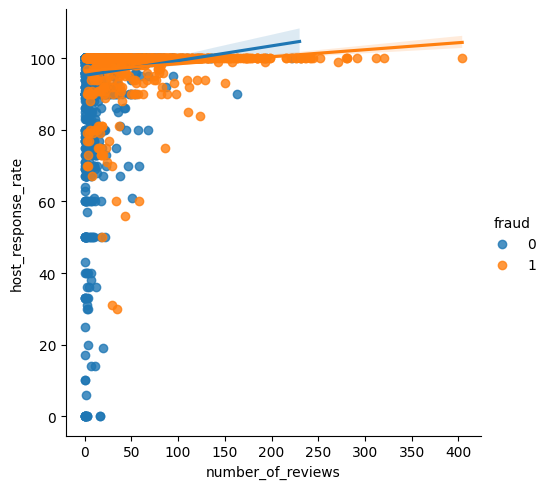

In [ ]:
sns.lmplot(x = 'number_of_reviews',y = 'host_response_rate',
           hue = 'fraud', data = df_noout)

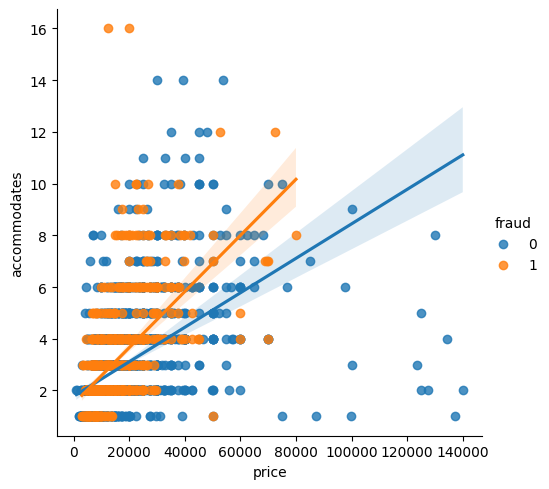

In [ ]:
sns.lmplot(x = 'price',y= 'accommodates',
           hue = 'fraud', data = df_noout)

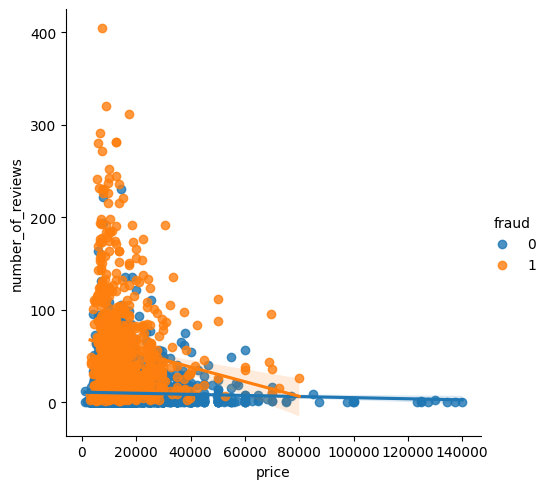

In [ ]:
sns.lmplot(x = 'price',y= 'number_of_reviews',
           hue = 'fraud', data = df_noout)

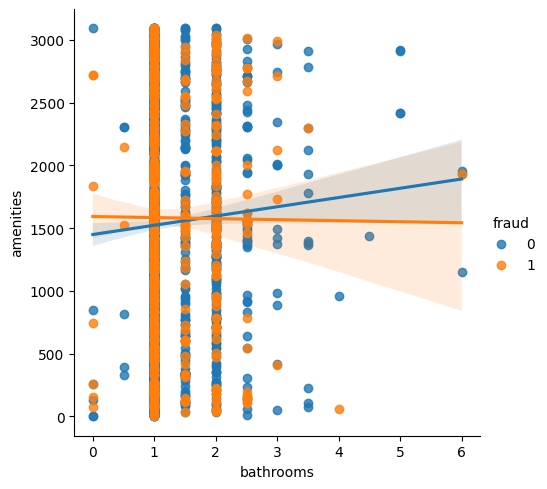

In [ ]:
sns.lmplot(x = 'bathrooms',y= 'amenities',
           hue = 'fraud', data = df_noout)

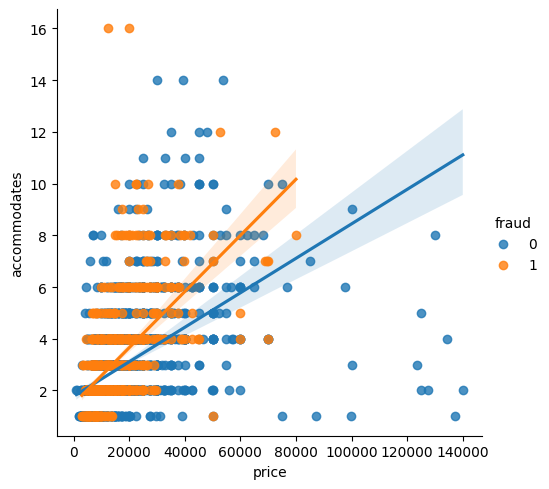

In [ ]:
sns.lmplot(x = 'price',y= 'accommodates',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'price',y = 'beds',
           hue = 'fraud', data = df_noout)

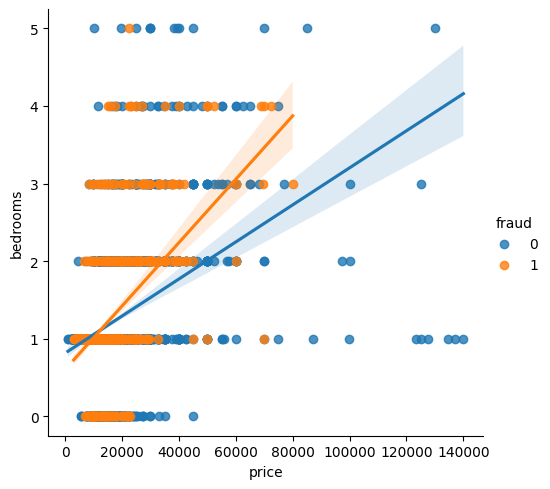

In [ ]:
sns.lmplot(x = 'price',y = 'bedrooms',
           hue = 'fraud', data = df_noout)

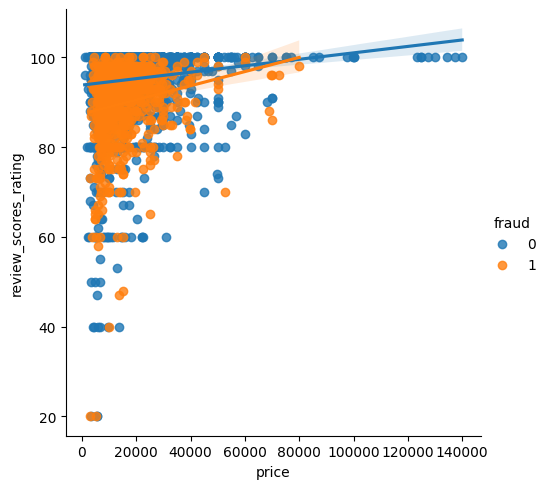

In [ ]:
sns.lmplot(x = 'price', y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'accommodates', y = 'reviews_per_month',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'bathrooms', y = 'amenities',
           hue = 'fraud', data = df_noout)

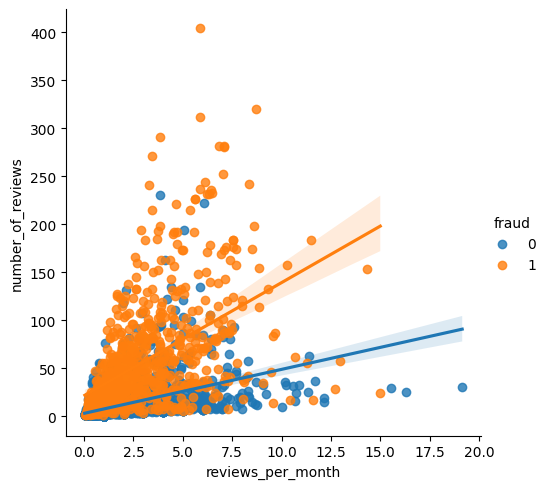

In [ ]:
sns.lmplot(x = 'reviews_per_month', y = 'number_of_reviews',
           hue = 'fraud', data = df_noout)

In [ ]:
sns.lmplot(x = 'reviews_per_month',y = 'review_scores_rating',
           hue = 'fraud', data = df_noout)

# Model

In [ ]:
cat_columns = ['property_type',
               'room_type',
               'bed_type',
               'accommodates',
               'instant_bookable',
               'cancellation_policy',
               'city']
num_columns = ['host_identity_verified',
               'host_total_listings_count',
               'is_location_exact',
               'bathrooms',
               'bedrooms',
               'beds',
               'amenities',
               'price',
               'minimum_nights',
               'number_of_reviews',
               'review_scores_rating',
               'reviews_per_month']
target = 'fraud'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define independent variables (X) and dependent variable(y) in the model
X = df_noout[cat_columns + num_columns]
y = df_noout['fraud']


# One-hot encoding for categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# split 20% of data to test, 80% to train
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=9967)


# Build Logistic Model
log_mod = LogisticRegression()

# Fit the model to the training data
log_mod.fit(X_train, y_train)

# Define independent variables (X) and dependent variable(y) in the model
X = df_noout[cat_columns + num_columns]
y = df_noout['fraud']

# One-hot encoding for categorical columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), cat_columns)], remainder='passthrough')
X_encoded = ct.fit_transform(X)

# split 20% of data to test, 80% to train
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=9967)

# Build Logistic Model
log_mod = LogisticRegression()

# Fit the model to the training data
log_mod.fit(X_train, y_train)

# Predict the test data
yhat_log = log_mod.predict_proba(X_test)[:, 1]

# Confusion matrix
y_pred = log_mod.predict(X_test)  # Predict class labels
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)


# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, yhat_log)
auc_roc = roc_auc_score(y_test, yhat_log)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Print AUC-ROC score
print("AUC-ROC Score (Final Model):", auc_roc)

## Using stepwise method to select variables

### Forward stepwise method

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Combine the categorical and numerical columns for convenience
all_columns = cat_columns + num_columns

# Perform forward stepwise selection
def forward_stepwise_selection(X, y, columns):
    selected_features = []
    remaining_features = columns.copy()

    # Add the constant term 'const' to the feature columns
    X = sm.add_constant(X)

    while remaining_features:
        best_pval = 1.0
        best_feature = None

        for feature in remaining_features:
            model_features = selected_features + [feature]
            model = sm.Logit(y, X[model_features])
            result = model.fit(disp=False)
            if result.pvalues[-1] < best_pval:  # Using -1 to access the p-value of the constant term
                best_pval = result.pvalues[-1]
                best_feature = feature

        if best_pval < 0.05:  # Set your significance level here (e.g., 0.05)
            selected_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break

    return selected_features

# Perform forward stepwise selection
selected_features = forward_stepwise_selection(X, y, all_columns)

# logistic regression model with forward stepwise selected features
X_selected = sm.add_constant(X[selected_features])
for_log_mod = sm.Logit(y, X_selected)
result_for = for_log_mod.fit()
print(result_for.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix


# Calculate probabilities and predictions for the model
y_prob_for = result_for.predict(X_selected)
y_pred_for = (y_prob_for > 0.5).astype(int)  # Binary predictions based on a threshold of 0.5

# ROC curve for the model
fpr_for, tpr_for, thresholds_for = roc_curve(y, y_prob_for)
auc_roc_for = roc_auc_score(y, y_prob_for)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_for, tpr_for)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Forward stepwise Model)')
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Final Model):", auc_roc_for)


# Calculate evaluation metrics for the final model
accuracy_for = accuracy_score(y, y_pred_for)
precision_for = precision_score(y, y_pred_for)
recall_for = recall_score(y, y_pred_for)
f1_for = f1_score(y, y_pred_for)
conf_matrix_for = confusion_matrix(y, y_pred_for)

print("Confusion Matrix:")
print(conf_matrix_for)

### Backward stepwise method

In [ ]:
# Backward stepwise selection
def backward_stepwise_selection(X, y, columns):
    selected_features = columns.copy()
    while len(selected_features) > 0:
        X_selected = sm.add_constant(X[selected_features])
        logit_model = sm.Logit(y, X_selected)
        result = logit_model.fit(disp=False)
        p_values = result.pvalues[1:]  # Exclude the constant term

        # Find the feature with the highest p-value and remove it
        feature_to_remove = p_values.idxmax()

        if p_values[feature_to_remove] >= 0.05:  # Set your significance level here (e.g., 0.05)
            selected_features.remove(feature_to_remove)
        else:
            break

    return selected_features

# Perform backward stepwise selection
selected_features_back= backward_stepwise_selection(X, y, all_columns)

# Final logistic regression model with selected features
X_selected_back = sm.add_constant(X[selected_features_back])
log_mod_back = sm.Logit(y, X_selected_back)
result_backward = log_mod_back.fit()

# Display the summary of the final model
print(result_backward.summary())


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Calculate probabilities and predictions for the final model
y_prob_back = result_backward.predict(X_selected_back)
y_pred_back = (y_prob_back > 0.5).astype(int)  # Binary predictions based on a threshold of 0.5

# ROC curve for the final model
fpr_back, tpr_back, thresholds_back = roc_curve(y, y_prob_back)
auc_roc_back = roc_auc_score(y, y_prob_back)

# Plot the ROC curve
plt.figure()
plt.plot(fpr_back, tpr_back)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Final Model - Backward Selection)')
plt.show()

# Print AUC-ROC score
print("AUC-ROC Score (Final Model - Backward Selection):", auc_roc_back)

# Calculate evaluation metrics for the final model
accuracy_back = accuracy_score(y, y_pred_back)
precision_back = precision_score(y, y_pred_back)
f1_back = f1_score(y, y_pred_back)
recall_back = recall_score(y, y_pred_back)
conf_matrix_back = confusion_matrix(y, y_pred_back)

print("Confusion Matrix:")
print(conf_matrix_back)

## Summary table of model statistics

In [ ]:
import pandas as pd

# Evaluation metrics for the three models
metrics_original = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'AUC-ROC Score': auc_roc
}

metrics_forward = {
    'Accuracy': accuracy_for,
    'Precision': precision_for,
    'Recall': recall_for,
    'F1 Score': f1_for,
    'AUC-ROC Score': auc_roc_for
}

metrics_backward = {
    'Accuracy': accuracy_back,
    'Precision': precision_back,
    'Recall': recall_back,
    'F1 Score': f1_back,
    'AUC-ROC Score': auc_roc_back
}

# Create a DataFrame for the table
df_metrics = pd.DataFrame([metrics_original, metrics_forward, metrics_backward],
                          index=['Original Model', 'Forward Selection', 'Backward Selection'])

# Print the table
print(df_metrics)


                    Accuracy  Precision    Recall  F1 Score  AUC-ROC Score
Original Model      0.844597   0.755011  0.465659  0.576041       0.901575
Forward Selection   0.845531   0.748927  0.479396  0.584590       0.896795
Backward Selection  0.844597   0.755011  0.465659  0.576041       0.896709


Considering the overall performance, the "Original Model" has the highest AUC-ROC score and a relatively high accuracy although it has slightly lower precision, recall, and F1 score compared to the "Forward Selection" model.

In [ ]:
# Get the feature names after one-hot encoding
feature_names = ct.get_feature_names_out(input_features=X.columns)

# Get the coefficients for each variable from the logistic regression model
coef_list = list(log_mod.coef_[0])

# Create a DataFrame to store the coefficients
coef_table = pd.DataFrame({'Feature': feature_names, 'Coefficient': coef_list})

# Add the intercept term to the coefficient table
coef_table.loc[len(coef_table)] = ['Intercept', log_mod.intercept_[0]]

# Set option to display all rows in the DataFrame
pd.set_option('display.max_rows', None)

# Print the coefficients table
print("Coefficient Table:")
print(coef_table)

# Reset the option to the default value
pd.reset_option('display.max_rows')

Coefficient Table:
                                 Feature  Coefficient
0               encoder__property_type_0     0.000516
1               encoder__property_type_1     0.000060
2               encoder__property_type_2     0.000088
3               encoder__property_type_3     0.000000
4               encoder__property_type_4     0.000017
5               encoder__property_type_5    -0.000017
6               encoder__property_type_6    -0.000014
7               encoder__property_type_7     0.000000
8               encoder__property_type_8    -0.000411
9               encoder__property_type_9     0.000089
10             encoder__property_type_10     0.000026
11             encoder__property_type_11     0.000008
12             encoder__property_type_12     0.000019
13                  encoder__room_type_0     0.001067
14                  encoder__room_type_1    -0.000751
15                  encoder__room_type_2     0.000067
16                   encoder__bed_type_0     0.000111
17       